## 흐림효과(= 블러링, 스무딩)
---

- 노이즈를 줄이거나 외부영향을 최소화하는데 사용
- 노이즈를 제거해 연산시 계산을 빠르고 정확하게 하는데 도움이 됨
- 존재하지 않는 데이터를 생성하는데 사용 
- 존재하는 데이터를 줄여 샘플링 된 이미지를 재구성할 때 사용


#### 1. 커널과 고정점

- 커널(= 필터)
    - 이미지에서 $(x, y)$의 픽셀과 해당 픽셀을 포함한 작은 크기의 공간
    - 특정 수식이나 함수를 적용해 새로운 이미지를 얻게 됨
    
- 컨볼루션
    - 새로운 픽셀을 만들어내기 위해 커널 크기의 화소 값을 어떤 시스템을 통과하도록 하여 계산하는 것
    - 블러링: 이미지를 흐리게 
    - 샤프닝: 이미지의 윤곽을 선명하게
    - 미분: 이미지 명도의 변화량을 구함
    
- 고정점
    - 커널을 통해 컨볼루션된 값을 할당한 지점
    
#### 2. 테두리 외삽법

- 컨볼루션을 적용할 때 이미지의 가장자리는 계산이 불가능
- 이 문제를 해결하기 위해 테두리의 이미지 바깥에 가상의 픽셀을 만들어 처리함
- 수행방법
    - 가상 픽셀의 값을 0으로 할당
    - 커널이 연산 가능한 부분부터 연산을 수행
    - 이미지의 시작과 끝을 연결해 폐곡선을 형성해서 이미지의 테두리 부분을 대신하게 함


## Q1. 표 5.8(테두리 유형)을 정독해보세요.

|속성|설명|
|:---:|:---:|
|cv2.BORDER_CONSTANT|고정 값으로 픽셀을 확장|
|cv2.BORDER_REPLICATE|테두리 픽셀을 복사해서 확장|
|cv2.BORDER_REFLECT|픽셀을 반사해서 확장|
|cv2.BORDER_WRAP|반대쪽 픽셀을 복사해서 확장|
|cv2.BORDER_REFLECT_101|이중 픽셀을 만들지 않고 반사해서 확장|
|cv2.BORDER_DEFAULT|reflect101 방식을 이용|
|cv2.BORDER_TRANSPARENT|픽셀을 투명하게 해서 확장|
|cv2.BORDER_ISOLATED|관심 영역 밖은 고려하지 않음|

### 흐림효과 4가지

#### 1. 단순 흐림 효과

> Q2. 단순 흐림 효과 함수를 적어보고, 설명해주세요. 하나의 이미지를 불러와 흐림 효과를 적용하여 출력해보세요.

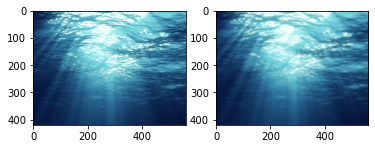

In [1]:
import cv2
import matplotlib.pyplot as plt
import os 

image_path = os.getenv('HOME') + '/Downloads/underthesea.png'
src = cv2.imread(image_path)
src= cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

dst = cv2.blur(src, ksize = (5, 5), anchor = None, borderType = None)

plt.subplot(1, 2, 1)
plt.imshow(src)
plt.subplot(1, 2, 2)
plt.imshow(dst)

- 입력 이미지(src)의 각 픽셀에 대해 커널을 적용해 모든 픽셀의 단순 평균을 구해 출력 이미지(dst)에 저장

#### 2. 박스 필터 흐림 효과

- 커널 내부 값이 일반적으로 모두 같으며, 그 값이 1의 값을 가짐

> Q3. 박스 필터 흐림 효과 함수를 읽어보고, 이미지에 박스 필터 흐림을 적용해보세요.

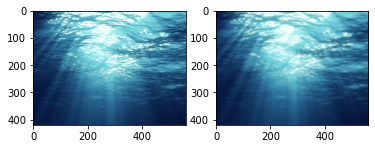

In [2]:
dst = cv2.boxFilter(src, ddepth=-5, ksize=(5, 5), anchor = None, normalize = None, borderType = None)
plt.subplot(1, 2, 1)
plt.imshow(src)
plt.subplot(1, 2, 2)
plt.imshow(dst)

#### 3. 중간값 흐림효과

- 고정점을 사용하지 않고, 중심 픽셀 주변으로 사각형 크기의 이웃한 픽셀의 중간값을 사용해 각 픽셀의 값을 변경
- 이는 고정점이 항상 커널의 중심에 있다고 가정하는 것
- 중간값을 선택하기 위해서는 ksize는 홀수여야 한다.

> Q4. 중간값 흐림 효과 함수를 읽어보고, 이미지에 중간값 흐림을 적용해보세요.(커널은 항상 홀수인 것 잊지 마세요!)

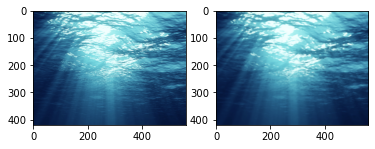

In [3]:
dst = cv2.medianBlur(src, ksize=5)
plt.subplot(1, 2, 1)
plt.imshow(src)
plt.subplot(1, 2, 2)
plt.imshow(dst)

#### 4. 양방향 필터 흐림 효과

- 가장자리를 선명히 보존하면서 노이즈를 우수하게 제거하는 흐림 효과 함수
- 두 종류의 가우시안 필터를 사용하여 흐림 효과를 적용
- 다른 흐림 효과 함수에 비해 느림

> Q5. 양방향 필터 함수를 적어보고, 각 옵션을 설명해주세요.

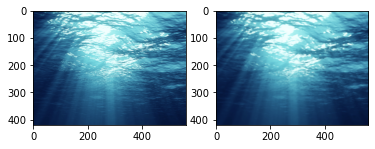

In [4]:
cv2.GaussianBlur(src, ksize=(5,5), sigmaX=0, sigmaY=None, borderType=None)
plt.subplot(1, 2, 1)
plt.imshow(src)
plt.subplot(1, 2, 2)
plt.imshow(dst)

> Q6. 이미지를 불러와 예제 5.14(python opencv에서의 양방향 필터 흐림 효과 함수)를 적용해보세요.

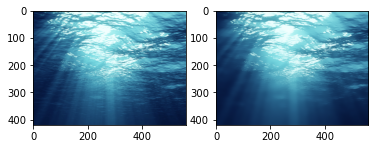

In [5]:
dst = cv2.bilateralFilter(src, d=20, sigmaColor=50, sigmaSpace=100, dst=None, borderType=None)
plt.subplot(1, 2, 1)
plt.imshow(src)
plt.subplot(1, 2, 2)
plt.imshow(dst)

## 필터링

### 1. 영상의 필터링
- 영상에서 원하는 정보만 통과시키고 원하지 않는 정보는 걸러내는 작업

#### 1-1. 마스크
- 작은 크기의 행렬
- 필터링의 성격을 정의하는 행렬
- 다양한 크기와 모양으로 정의 가능

#### 1-2. 마스크를 이용한 필터링 연산 방법
- 모든 입력 영상의 픽셀 위로 마스크 행렬을 이동시키면서 마스크 연산을 수행하는 방식으로 이루어짐

### 2. 샤프닝
- 초점이 잘 맞은 사진처럼 사물의 윤곽이 뚜렷하고 선명한 느낌이 나도록 영상을 변경하는 필터링 기법

> Q7. 아래의 소스코드를 참고하여, 특정 이미지에 언샤프 마스크를 적용해보세요

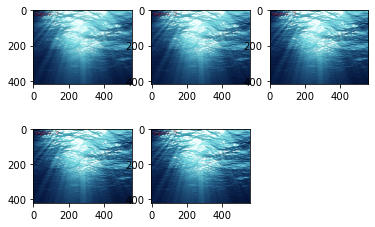

In [6]:
import sys
import numpy as np
import cv2

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

for sigma in range(1, 6):
    blurred = cv2.GaussianBlur(src, (0, 0), sigma)

    alpha = 1.0
    dst = cv2.addWeighted(src, 1 + alpha, blurred, -alpha, 0.0)

    desc = "sigma: %d" % sigma
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
               1.0, 255, 1, cv2.LINE_AA)
    
    plt.subplot(2, 3, sigma)
    plt.imshow(dst)

### 3. 잡음 제거 필터링

- 전처리 과정으로 잡음 제거 필터를 사용해야 함

In [12]:
import numpy as np
import cv2
import random


def noise_gaussian():
    
    image_path = os.getenv('HOME') + '/Downloads/underthesea.png'
    src = cv2.imread(image_path)
    src= cv2.cvtColor(src, cv2.COLOR_BGR2RGB)


    if src is None:
        print('Image load failed!')
        return

    cv2.imshow('src', src)

    for stddev in [10, 20, 30]:
        noise = np.zeros(src.shape, np.int32)
        cv2.randn(noise, 0, stddev)

        dst = cv2.add(src, noise, dtype=cv2.CV_8UC1)

        desc = 'stddev = %d' % stddev
        cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                   1.0, 255, 1, cv2.LINE_AA)
        
        plt.imshow(dst)


def filter_bilateral():
    
    image_path = os.getenv('HOME') + '/Downloads/underthesea.png'
    src = cv2.imread(image_path)
    src= cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

    if src is None:
        print('Image load failed!')
        return

    noise = np.zeros(src.shape, np.int32)
    cv2.randn(noise, 0, 5)
    cv2.add(src, noise, src, dtype=cv2.CV_8UC1)

    dst1 = cv2.GaussianBlur(src, (0, 0), 5)
    dst2 = cv2.bilateralFilter(src, -1, 10, 5)
    
    plt.imshow(src)
    plt.imshow(dst1)
    plt.imshow(dst2)


#### noise_gaussian() 함수 적용

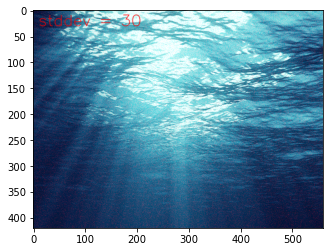

In [13]:
noise_gaussian()

#### filter_bilateral()

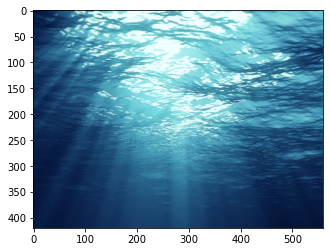

In [14]:
filter_bilateral()

#### 미디언 필터 
- 자기 자신 펙설과 주변 픽셀 값 중 중간값을 선택하여 결과 영상 픽셀 값으로 설정하는 필터링 기법
- 잡음 픽셀 갑싱 주변 픽셀 값과 큰 차이가 있는 경우 경우 효과적으로 작동



In [17]:
def filter_median():
    
    image_path = os.getenv('HOME') + '/Downloads/colorful.jpg'
    src = cv2.imread(image_path)
    src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
    src = cv2.resize(src, (350, 350))
    
    if src is None:
        print('Image load failed!')
        return

    for i in range(0, int(src.size / 10)):
        x = random.randint(0, src.shape[1] - 1)
        y = random.randint(0, src.shape[0] - 1)
        src[x, y] = (i % 2) * 255

    #여기서도 위와 똑같이 cv2 함수를 사용하고 있군요!
    dst1 = cv2.GaussianBlur(src, (0, 0), 1)
    dst2 = cv2.medianBlur(src, 3)

    plt.imshow(src)
    plt.imshow(dst1)
    plt.imshow(dst2)

#### filter_median()

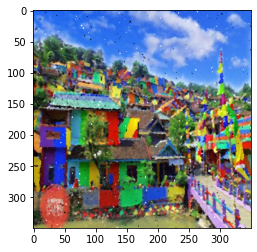

In [18]:
filter_median()